In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from network import Sequential, costfunc, regularization_term, output_class
from sklearn.model_selection import train_test_split

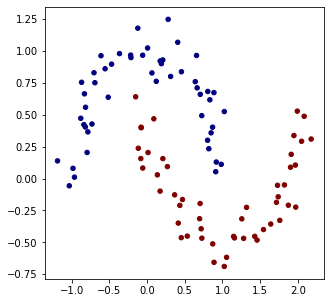

[0 1 1 1 1 0 1 0 0 1 0 1 1 1 0]


In [3]:
# make up a dataset

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()
print(y[5:20])

In [4]:

# Random weights
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
layer_dims = [2, 25, 25, 1]
eps_init = 1
weights= [
            np.random.uniform(-eps_init, eps_init, (layer_dims[i + 1], layer_dims[i] + 1))
            for i in range(len(layer_dims) -1)
        ]
model = Sequential(layer_dims, weights)
alpha = 1e-4 # Regularization parameter
n_epochs = 100
batch_size = len(y_train)
print(batch_size)

for ie in range(n_epochs):
    eta =   1.0 - .9*ie/n_epochs # Learning rate

    model.zero_gradients()
    y_pred = np.array(list(map(model, X_train, y_train)))
    y_out = np.array(list(map(lambda yp: 1.*(yp > .5),y_pred)))
    model.make_gradients(alpha, batch_size)
    scores = [np.allclose(youti,yi) for youti, yi in zip(y_out,y_train)]
    accuracy = sum(scores)/batch_size
    cost = sum(costfunc(yi, y_predi) for yi, y_predi in zip(y_train, y_pred))
    reg_term = regularization_term(model.weights, alpha)
    cost += reg_term
    cost /= batch_size

    for i in range(model.n_weights):
        model.weights[i] -= eta*model.gradients[i] 

    if ie % 1 == 0:
        print(f"step {ie} cost {cost}, accuracy {accuracy*100}%")


90
step 0 cost [0.83064185], accuracy 34.44444444444444%
step 1 cost [0.81302594], accuracy 50.0%
step 2 cost [0.83722658], accuracy 50.0%
step 3 cost [0.90906139], accuracy 50.0%
step 4 cost [0.98918763], accuracy 50.0%
step 5 cost [0.98110709], accuracy 50.0%
step 6 cost [0.93722894], accuracy 50.0%
step 7 cost [0.8596085], accuracy 50.0%
step 8 cost [0.80425576], accuracy 50.0%
step 9 cost [0.7438304], accuracy 50.0%
step 10 cost [0.69890395], accuracy 50.0%
step 11 cost [0.65456446], accuracy 50.0%
step 12 cost [0.6199645], accuracy 54.44444444444444%
step 13 cost [0.58769756], accuracy 70.0%
step 14 cost [0.56194604], accuracy 73.33333333333333%
step 15 cost [0.53910338], accuracy 81.11111111111111%
step 16 cost [0.52075913], accuracy 76.66666666666667%
step 17 cost [0.50514942], accuracy 80.0%
step 18 cost [0.49247523], accuracy 75.55555555555556%
step 19 cost [0.48178878], accuracy 78.88888888888889%
step 20 cost [0.47278021], accuracy 75.55555555555556%
step 21 cost [0.4649289]

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[3]
 [8]
 [1]
 [1]
 [9]
 [8]
 [7]
 [7]
 [9]
 [1]]
5000


array([1], dtype=uint8)

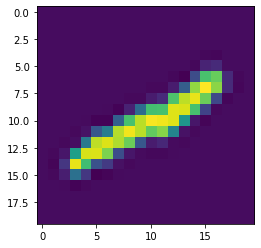

In [2]:

# Weights data 
mat = scipy.io.loadmat('test_data/ex4weights.mat')
arrays = {}
for k, v in mat.items():
    arrays[k] = np.array(v)
Theta0 = arrays['Theta1']
Theta1 = arrays['Theta2']

print(np.shape(Theta0))
print(np.shape(Theta1))

(25, 401)
(10, 26)


In [75]:
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot
 
#loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

y = np.zeros((np.size(y_train),10))
X = np.zeros((len(X_train),784))

for i in range(np.size(y_train)):
    y[i,y_train[i]] = 1
    X[i] = np.reshape(X_train[i],784)
idx = np.random.randint(0,4999,10)
# print(idx)
print(y[idx,:])
print(np.shape(X))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
(6000, 784)


In [78]:

# Random weights
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
layer_dims = [784, 25, 10]
eps_init = 0.12
weights= [
            np.random.uniform(-eps_init, eps_init, (layer_dims[i + 1], layer_dims[i] + 1))
            for i in range(len(layer_dims) -1)
        ]
model = Sequential(layer_dims, weights)
alpha = .1 # Regularization parameter
n_epochs = 50
batch_size = len(y_train)

for ie in range(n_epochs):
    eta =   1.0 - 0.9*ie/n_epochs # Learning rate

    model.zero_gradients()
    y_pred = np.array(list(map(model, X_train, y_train)))
    y_out = np.array(list(map(output_class,y_pred)))
    model.make_gradients(alpha, batch_size)
    scores = [np.allclose(youti,yi) for youti, yi in zip(y_out,y_train)]
    accuracy = sum(scores)/batch_size
    cost = sum(costfunc(yi, y_predi) for yi, y_predi in zip(y_train, y_pred))
    reg_term = regularization_term(model.weights, alpha)
    cost += reg_term
    cost /= batch_size

    for i in range(model.n_weights):
        model.weights[i] -= eta*model.gradients[i] 

    if ie % 1 == 0:
        print(f"step {ie} cost {cost}, accuracy {accuracy*100}%")

/home/maximilian/Machine-Learning/Neural-Network/network/_nn.py:71: RuntimeWarning: overflow encountered in exp
  


step 0 cost 6.936469008562339, accuracy 8.833333333333334%
step 1 cost 3.5220452510846134, accuracy 9.933333333333334%
step 2 cost 3.293499321449726, accuracy 11.933333333333334%
step 3 cost 3.2478790760145038, accuracy 14.866666666666667%
step 4 cost 3.2145212942641144, accuracy 23.233333333333334%
step 5 cost 3.1850639240376295, accuracy 26.73333333333333%
step 6 cost 3.154592580810903, accuracy 25.333333333333336%
step 7 cost 3.1150294289521727, accuracy 28.7%
step 8 cost 3.078684355906655, accuracy 32.86666666666667%
step 9 cost 3.050406164315837, accuracy 33.7%
step 10 cost 3.037241413025721, accuracy 28.133333333333333%
step 11 cost 3.0354386124760278, accuracy 33.266666666666666%
step 12 cost 2.9710925156914683, accuracy 37.2%
step 13 cost 2.9367508342813657, accuracy 36.96666666666666%
step 14 cost 2.920377333840663, accuracy 36.13333333333333%
step 15 cost 2.8865249355245934, accuracy 39.4%
step 16 cost 2.8512218692504137, accuracy 41.13333333333333%
step 17 cost 2.82979327298